## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  95.449304  1719.702176  0.698763  1.331156  1.329188
1  78.521945  1567.106868  0.443846  5.755184  1.466925
2  10.006966  1279.766651  0.419303  4.269180  1.596548
3  97.256566   876.372035  0.139795  3.772814  0.980779
4  36.540153  1132.409275  0.691684  3.285132  1.368311


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0707756	total: 57.4ms	remaining: 57.4s
1:	learn: 1.0625258	total: 57.9ms	remaining: 28.9s
2:	learn: 1.0532130	total: 58.4ms	remaining: 19.4s
3:	learn: 1.0423813	total: 58.8ms	remaining: 14.6s
4:	learn: 1.0302738	total: 59.2ms	remaining: 11.8s
5:	learn: 1.0195100	total: 59.7ms	remaining: 9.89s
6:	learn: 1.0104194	total: 60.1ms	remaining: 8.53s
7:	learn: 0.9992202	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9883945	total: 61.2ms	remaining: 6.73s
9:	learn: 0.9771716	total: 61.5ms	remaining: 6.09s
10:	learn: 0.9664115	total: 62ms	remaining: 5.57s
11:	learn: 0.9570168	total: 62.5ms	remaining: 5.15s
12:	learn: 0.9462100	total: 62.9ms	remaining: 4.78s
13:	learn: 0.9376275	total: 64.1ms	remaining: 4.51s
14:	learn: 0.9277761	total: 64.7ms	remaining: 4.25s
15:	learn: 0.9170176	total: 65.1ms	remaining: 4s
16:	learn: 0.9072697	total: 65.5ms	remaining: 3.79s
17:	learn: 0.8983147	total: 65.9ms	remaining: 3.6s
18:	learn: 0.8892732	total: 66.3ms	remaining: 3.42

120:	learn: 0.3749978	total: 108ms	remaining: 784ms
121:	learn: 0.3722590	total: 109ms	remaining: 782ms
122:	learn: 0.3696485	total: 109ms	remaining: 777ms
123:	learn: 0.3667360	total: 110ms	remaining: 774ms
124:	learn: 0.3644146	total: 110ms	remaining: 770ms
125:	learn: 0.3621516	total: 110ms	remaining: 766ms
126:	learn: 0.3599047	total: 111ms	remaining: 761ms
127:	learn: 0.3571656	total: 111ms	remaining: 757ms
128:	learn: 0.3543975	total: 112ms	remaining: 754ms
129:	learn: 0.3515720	total: 112ms	remaining: 750ms
130:	learn: 0.3497375	total: 113ms	remaining: 746ms
131:	learn: 0.3474274	total: 113ms	remaining: 743ms
132:	learn: 0.3451497	total: 113ms	remaining: 739ms
133:	learn: 0.3425776	total: 114ms	remaining: 736ms
134:	learn: 0.3404422	total: 114ms	remaining: 732ms
135:	learn: 0.3375958	total: 114ms	remaining: 727ms
136:	learn: 0.3360782	total: 115ms	remaining: 723ms
137:	learn: 0.3335738	total: 115ms	remaining: 720ms
138:	learn: 0.3317083	total: 116ms	remaining: 716ms
139:	learn: 

297:	learn: 0.1566019	total: 186ms	remaining: 437ms
298:	learn: 0.1560150	total: 186ms	remaining: 436ms
299:	learn: 0.1557474	total: 186ms	remaining: 435ms
300:	learn: 0.1553273	total: 187ms	remaining: 434ms
301:	learn: 0.1547522	total: 187ms	remaining: 433ms
302:	learn: 0.1542578	total: 188ms	remaining: 432ms
303:	learn: 0.1536574	total: 188ms	remaining: 430ms
304:	learn: 0.1531976	total: 188ms	remaining: 429ms
305:	learn: 0.1527251	total: 189ms	remaining: 428ms
306:	learn: 0.1522006	total: 189ms	remaining: 427ms
307:	learn: 0.1519322	total: 190ms	remaining: 426ms
308:	learn: 0.1513938	total: 190ms	remaining: 425ms
309:	learn: 0.1506962	total: 191ms	remaining: 425ms
310:	learn: 0.1501384	total: 191ms	remaining: 424ms
311:	learn: 0.1497781	total: 192ms	remaining: 423ms
312:	learn: 0.1492044	total: 192ms	remaining: 422ms
313:	learn: 0.1486701	total: 193ms	remaining: 421ms
314:	learn: 0.1482801	total: 193ms	remaining: 420ms
315:	learn: 0.1480675	total: 193ms	remaining: 419ms
316:	learn: 

539:	learn: 0.0745521	total: 290ms	remaining: 247ms
540:	learn: 0.0743320	total: 290ms	remaining: 246ms
541:	learn: 0.0741840	total: 290ms	remaining: 245ms
542:	learn: 0.0741361	total: 291ms	remaining: 245ms
543:	learn: 0.0739897	total: 291ms	remaining: 244ms
544:	learn: 0.0737091	total: 291ms	remaining: 243ms
545:	learn: 0.0736630	total: 292ms	remaining: 242ms
546:	learn: 0.0735178	total: 292ms	remaining: 242ms
547:	learn: 0.0732188	total: 292ms	remaining: 241ms
548:	learn: 0.0731745	total: 293ms	remaining: 240ms
549:	learn: 0.0728829	total: 293ms	remaining: 240ms
550:	learn: 0.0728424	total: 293ms	remaining: 239ms
551:	learn: 0.0725577	total: 294ms	remaining: 238ms
552:	learn: 0.0725180	total: 294ms	remaining: 238ms
553:	learn: 0.0724789	total: 294ms	remaining: 237ms
554:	learn: 0.0722143	total: 295ms	remaining: 236ms
555:	learn: 0.0719393	total: 295ms	remaining: 236ms
556:	learn: 0.0719011	total: 296ms	remaining: 235ms
557:	learn: 0.0718636	total: 296ms	remaining: 235ms
558:	learn: 

720:	learn: 0.0470479	total: 366ms	remaining: 142ms
721:	learn: 0.0470275	total: 367ms	remaining: 141ms
722:	learn: 0.0468590	total: 367ms	remaining: 141ms
723:	learn: 0.0467189	total: 368ms	remaining: 140ms
724:	learn: 0.0465813	total: 368ms	remaining: 140ms
725:	learn: 0.0465276	total: 369ms	remaining: 139ms
726:	learn: 0.0463900	total: 369ms	remaining: 139ms
727:	learn: 0.0461342	total: 369ms	remaining: 138ms
728:	learn: 0.0459699	total: 370ms	remaining: 138ms
729:	learn: 0.0458317	total: 370ms	remaining: 137ms
730:	learn: 0.0455839	total: 371ms	remaining: 136ms
731:	learn: 0.0454505	total: 371ms	remaining: 136ms
732:	learn: 0.0453211	total: 371ms	remaining: 135ms
733:	learn: 0.0451905	total: 372ms	remaining: 135ms
734:	learn: 0.0450315	total: 372ms	remaining: 134ms
735:	learn: 0.0447883	total: 373ms	remaining: 134ms
736:	learn: 0.0445524	total: 373ms	remaining: 133ms
737:	learn: 0.0444260	total: 374ms	remaining: 133ms
738:	learn: 0.0442943	total: 374ms	remaining: 132ms
739:	learn: 

954:	learn: 0.0237798	total: 470ms	remaining: 22.2ms
955:	learn: 0.0237084	total: 471ms	remaining: 21.7ms
956:	learn: 0.0236379	total: 471ms	remaining: 21.2ms
957:	learn: 0.0235592	total: 472ms	remaining: 20.7ms
958:	learn: 0.0234864	total: 472ms	remaining: 20.2ms
959:	learn: 0.0233959	total: 472ms	remaining: 19.7ms
960:	learn: 0.0232752	total: 473ms	remaining: 19.2ms
961:	learn: 0.0232078	total: 473ms	remaining: 18.7ms
962:	learn: 0.0231201	total: 473ms	remaining: 18.2ms
963:	learn: 0.0230545	total: 474ms	remaining: 17.7ms
964:	learn: 0.0229690	total: 474ms	remaining: 17.2ms
965:	learn: 0.0229115	total: 475ms	remaining: 16.7ms
966:	learn: 0.0228358	total: 475ms	remaining: 16.2ms
967:	learn: 0.0227657	total: 475ms	remaining: 15.7ms
968:	learn: 0.0226921	total: 476ms	remaining: 15.2ms
969:	learn: 0.0226239	total: 476ms	remaining: 14.7ms
970:	learn: 0.0225524	total: 477ms	remaining: 14.2ms
971:	learn: 0.0224854	total: 477ms	remaining: 13.7ms
972:	learn: 0.0224116	total: 477ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

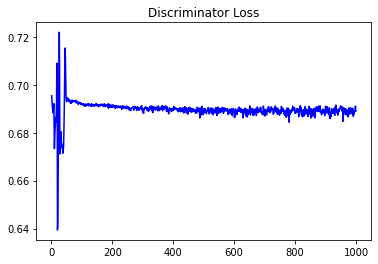

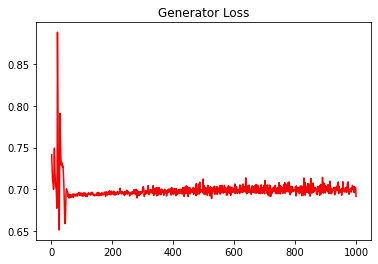

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2208540256104461


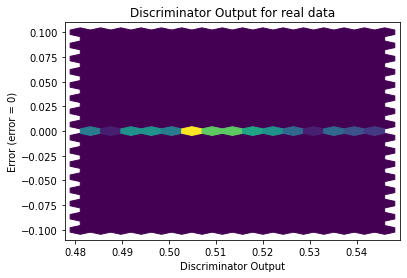

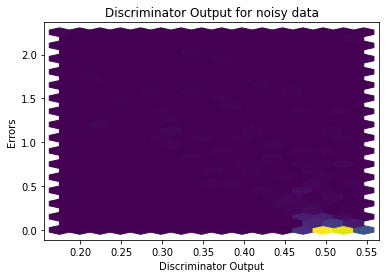

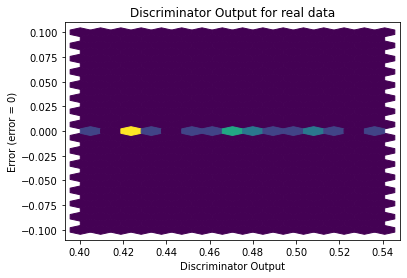

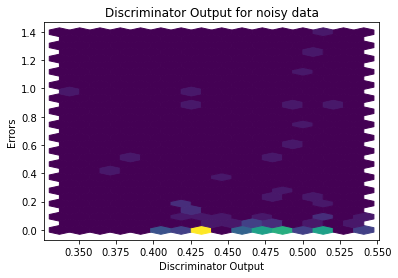

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


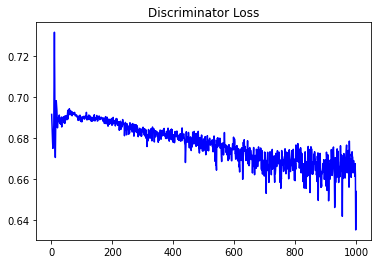

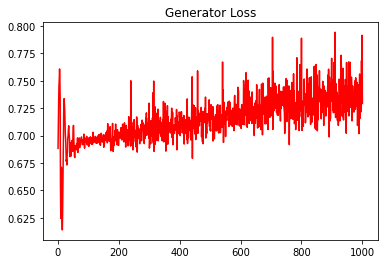

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16522969605450652


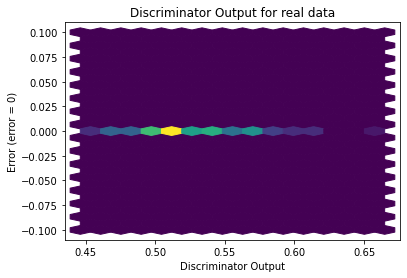

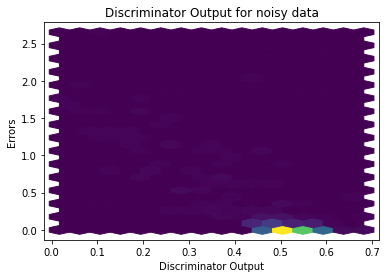

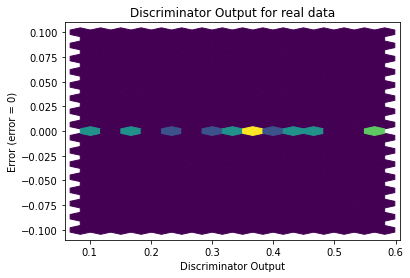

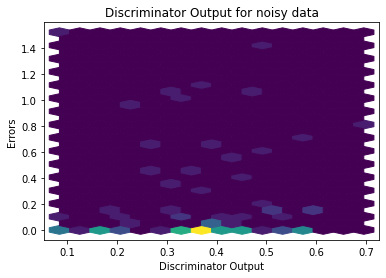

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2142]], requires_grad=True)
